In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
# import 4 libraries and set theme

In [2]:
json_df = pd.read_json("salary.json", orient = 'records')
json_df.to_csv("json_salary.csv", index=False)
# load json and conert to csv

In [3]:
unique_df = pd.concat([pd.read_csv('json_salary.csv'), pd.read_csv('salaries.csv')], ignore_index=True).drop_duplicates(keep='first')
# Combine two CSVs, remove duplicates, and store in unique_df

In [4]:
unique_df.to_csv('combined_unique_salary_data.csv', index=False) # Save unique data to a new CSV

In [5]:
df = pd.read_csv("combined_unique_salary_data.csv",dtype={'company_name': str}) 
# Load the combined unique salary data, ensuring 'company_name' is string type

In [6]:
df.head(5) # Display the first 5 rows of the DataFrame

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_name
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M,OpenAI
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M,Anthropic
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M,OpenAI
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M,Tencent AI Lab
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M,DeepMind


In [7]:
df.info() # Show DataFrame summary (shape, columns, dtypes, non-null counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187437 entries, 0 to 187436
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           187437 non-null  int64 
 1   experience_level    187437 non-null  object
 2   employment_type     187437 non-null  object
 3   job_title           187437 non-null  object
 4   salary              187437 non-null  int64 
 5   salary_currency     187437 non-null  object
 6   salary_in_usd       187437 non-null  int64 
 7   employee_residence  187437 non-null  object
 8   remote_ratio        187437 non-null  int64 
 9   company_location    187437 non-null  object
 10  company_size        187437 non-null  object
 11  company_name        119549 non-null  object
dtypes: int64(4), object(8)
memory usage: 17.2+ MB


In [8]:
df.describe() # Display descriptive statistics for numerical columns

,work_year,salary,salary_in_usd,remote_ratio
count,187437.000000,1.874370e+05,187437.000000,187437.000000
mean,2024.391945,1.623506e+05,154282.165805,22.654812
std,0.705470,2.544617e+05,76403.136283,41.757320
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.000000e+05,100000.000000,0.000000
50%,2024.000000,1.429000e+05,142200.000000,0.000000
75%,2025.000000,1.955000e+05,194800.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [9]:
# Count missing values in each column
df.isnull().sum()

work_year                 0
experience_level          0
employment_type           0
job_title                 0
salary                    0
salary_currency           0
salary_in_usd             0
employee_residence        0
remote_ratio              0
company_location          0
company_size              0
company_name          67888
dtype: int64

In [10]:
print("shape : ",df.shape)
# Print the DataFrame's shape (rows, columns)

shape :  (187437, 12)


In [11]:
print("columns name are : ")
df.columns # Display column names

columns name are : 


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'company_name'],
      dtype='object')

In [12]:
df.isnull().sum() #sum of missing value

work_year                 0
experience_level          0
employment_type           0
job_title                 0
salary                    0
salary_currency           0
salary_in_usd             0
employee_residence        0
remote_ratio              0
company_location          0
company_size              0
company_name          67888
dtype: int64

In [13]:
df.dropna() # drop those raw which has non value

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_name
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M,OpenAI
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M,Anthropic
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M,OpenAI
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M,Tencent AI Lab
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M,DeepMind
...,...,...,...,...,...,...,...,...,...,...,...,...
119544,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,Baidu AI
119545,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,Adobe Sensei
119546,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,Apple ML Research
119547,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,IBM Watson


In [14]:
df.columns.tolist() # print column as list

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size',
 'company_name']

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_') # formate column name

In [16]:
df.columns.tolist() # check again

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size',
 'company_name']

In [17]:
df.duplicated().sum() # sum of duplicate raws

0

In [20]:
df['salary_in_usd'].dtype # print data type

dtype('int64')

In [21]:
df['salary'].dtype # print data type

dtype('int64')

In [22]:
print("What are the unique job titles in the dataset?")
df['job_title'].unique() # display unique job title

What are the unique job titles in the dataset?


array(['Data Quality Analyst', 'Applied Scientist', 'Data Scientist',
       'Manager', 'Software Engineer', 'Machine Learning Engineer',
       'Machine Learning Scientist', 'Analyst', 'Power BI Developer',
       'Engineer', 'Research Assistant', 'Director', 'AI Engineer',
       'Tech Lead', 'Data Lead', 'Consultant', 'Data Manager',
       'Developer', 'Solutions Architect', 'Head of Data', 'Data Analyst',
       'Analytics Engineer', 'Data Visualization Engineer',
       'Product Owner', 'Data Governance', 'Data Specialist', 'Architect',
       'Product Manager', 'Data Engineer', 'Data Architect',
       'Quantitative Researcher', 'Researcher', 'Staff Engineer',
       'Engineering Manager', 'Solution Architect', 'DevOps Engineer',
       'Associate', 'Site Reliability Engineer', 'Research Scientist',
       'Product Analyst', 'Principal Researcher',
       'AIRS Solutions Specialist', 'Data Product Manager',
       'Data Management Analyst', 'Full Stack Developer',
       'Softwa

In [23]:
print("Which companies are offering the highest average salaries?")
top_companies = (
     df.groupby('company_name')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print(top_companies)

# Group by company, calculate average salary, sort, and show top 10

Which companies are offering the highest average salaries?
company_name
Salesforce AI        157138.204475
Microsoft AI         157018.333083
IBM Watson           156605.819980
DeepMind             156551.050156
Google DeepMind      156516.436980
OpenAI               156479.720415
Apple ML Research    156360.577010
Tesla Autonomy       156215.180569
NVIDIA AI            156149.183686
Amazon AI Labs       155954.058618
Name: salary_in_usd, dtype: float64


In [24]:
print("What is the average salary for each job title?")
top_job_titles = (
    df.groupby('job_title')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

print(top_job_titles)

# Group by job title, calculate average salary, sort, and show top 15

What is the average salary for each job title?
job_title
Research Team Lead                       450000.000000
Analytics Engineering Manager            399880.000000
Data Science Tech Lead                   375000.000000
Applied AI ML Lead                       292500.000000
IT Enterprise Data Architect             284090.000000
Head of Applied AI                       275857.142857
Head of Machine Learning                 271331.655172
Director of Data                         270000.000000
Director of Product Management           263349.111111
AIRS Solutions Specialist                263250.000000
Machine Learning Performance Engineer    262500.000000
AWS Data Architect                       258000.000000
Engineering Manager                      254259.441292
Director of Machine Learning             253615.789474
Enterprise Account Executive             250216.974684
Name: salary_in_usd, dtype: float64


In [25]:
print("How many jobs are listed per location?")
jobs_per_location = df['company_location'].value_counts() # Count jobs per location
print(jobs_per_location.head(10)) # Display top 10 locations by job count

How many jobs are listed per location?
company_location
US    162206
CA      9750
GB      6434
AU      1011
NL       786
DE       770
FR       670
LT       648
AT       485
ES       470
Name: count, dtype: int64


1. Bar Plot - Average Salary by Job Title


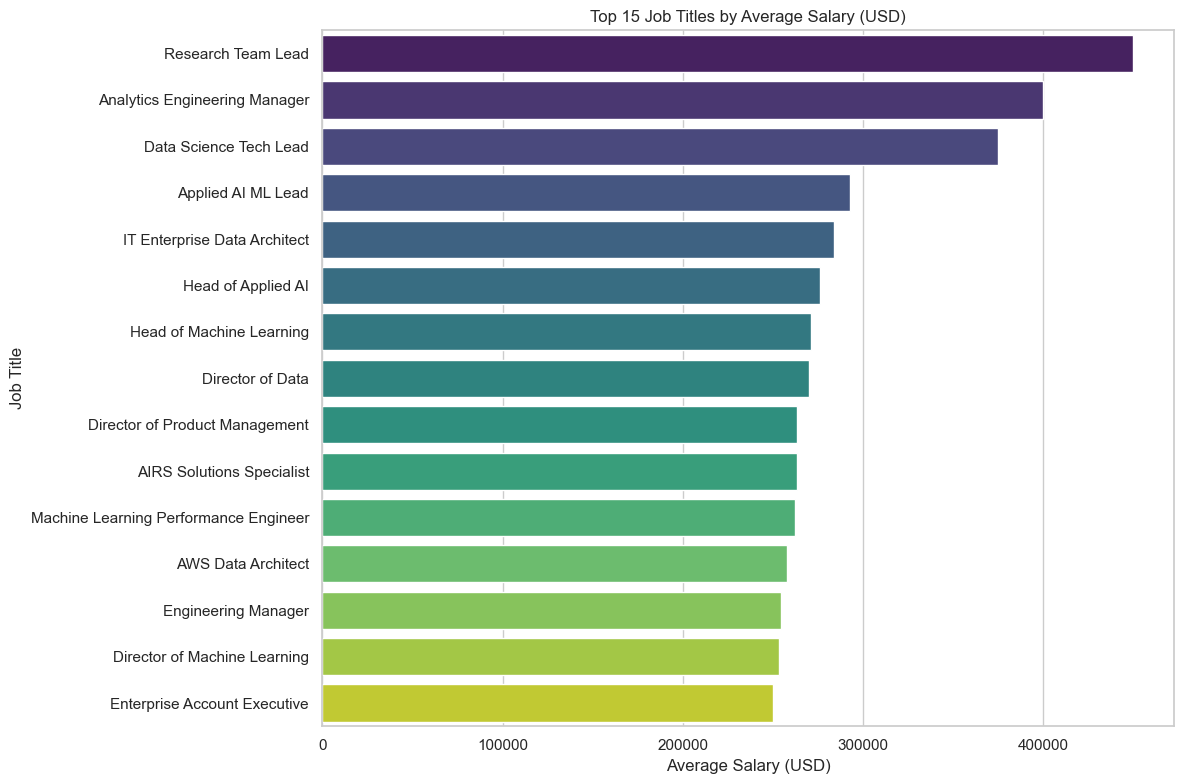

In [26]:
print("1. Bar Plot - Average Salary by Job Title")

job_title_avg_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
top_15_job_titles = job_title_avg_salary.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_job_titles.values, y=top_15_job_titles.index, palette='viridis')
plt.title('Top 15 Job Titles by Average Salary (USD)')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

#1. Bar Plot - Average Salary by Job Title

2. Box Plot - Salary Distribution for Top 5 Companies


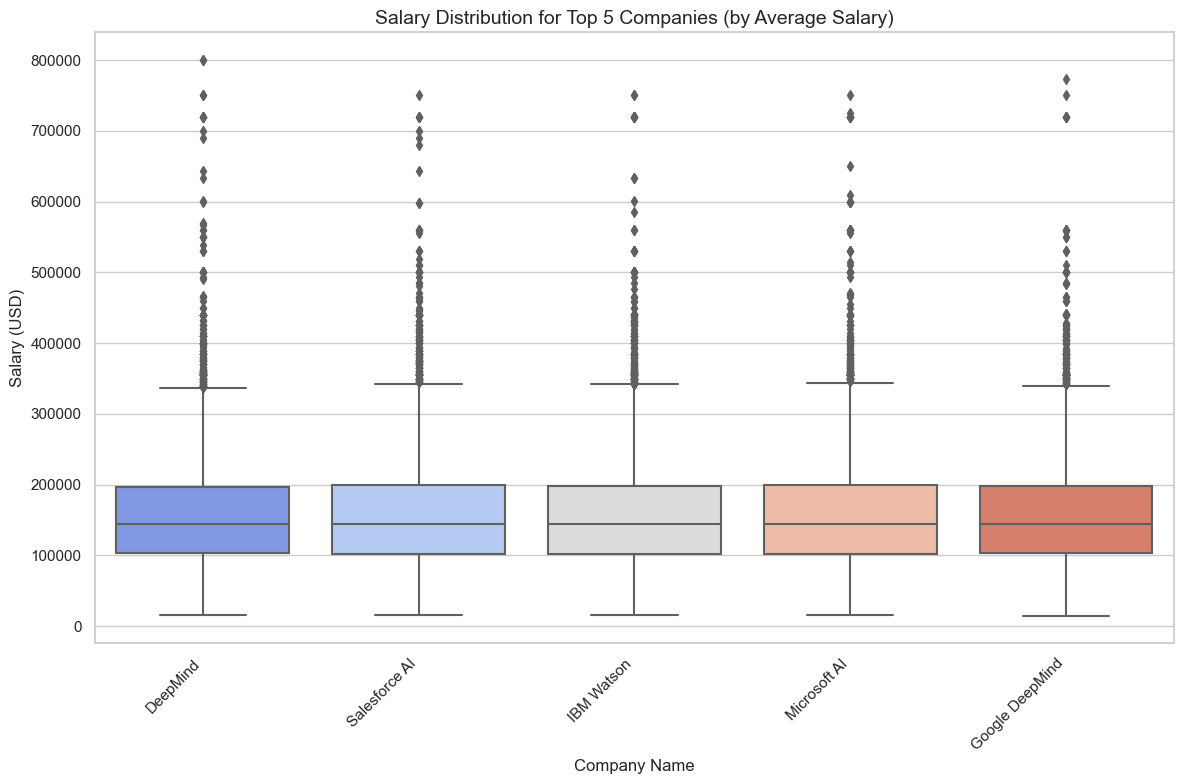

In [27]:
print("2. Box Plot - Salary Distribution for Top 5 Companies")

top_5_companies = df.groupby('company_name')['salary_in_usd'].mean().nlargest(5).index.tolist()
df_top_companies = df[df['company_name'].isin(top_5_companies)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='company_name', y='salary_in_usd', data=df_top_companies, palette='coolwarm', showfliers=True)
plt.title('Salary Distribution for Top 5 Companies (by Average Salary)',fontsize=14)
plt.xlabel('Company Name',fontsize=12)
plt.ylabel('Salary (USD)',fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#2. Box Plot - Salary Distribution for Top 5 Companies

3. Count Plot - Number of Jobs per Location


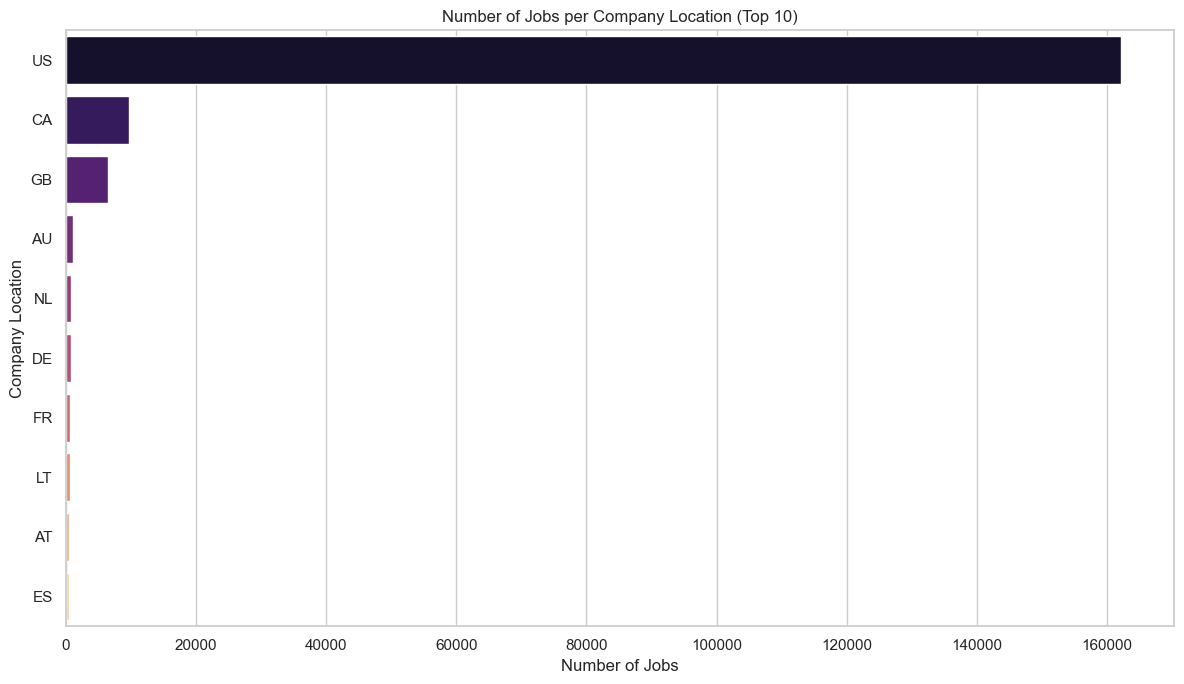

In [28]:
print("3. Count Plot - Number of Jobs per Location")

top_10_locations = df['company_location'].value_counts().head(10).index.tolist()
df_top_locations = df[df['company_location'].isin(top_10_locations)]

plt.figure(figsize=(12, 7))
sns.countplot(y='company_location', data=df_top_locations, order=df_top_locations['company_location'].value_counts().index, palette='magma')
plt.title('Number of Jobs per Company Location (Top 10)')
plt.xlabel('Number of Jobs')
plt.ylabel('Company Location')
plt.tight_layout()
plt.show()

# 3. Count Plot - Number of Jobs per Location

4. Average Salary Trend Over the Years


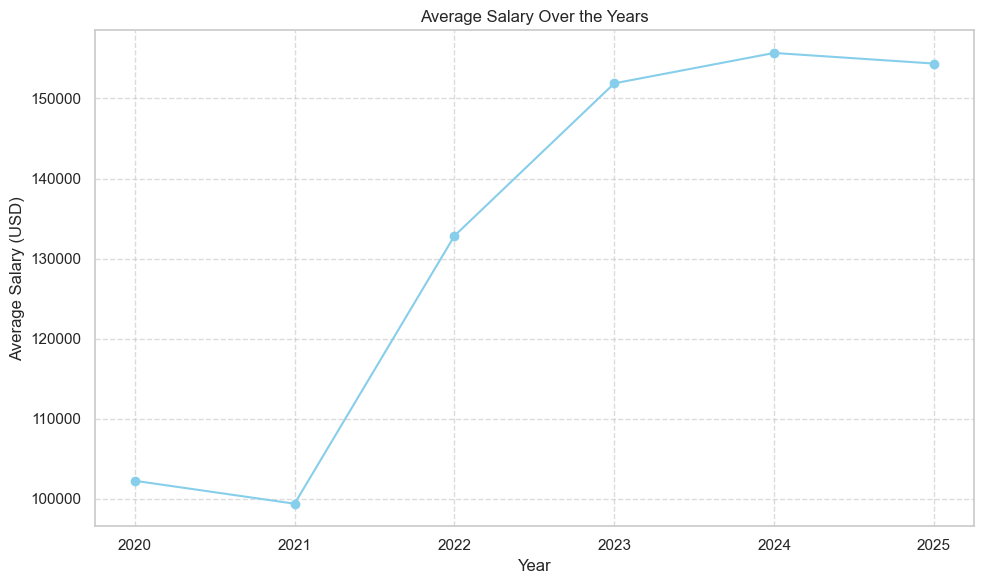

In [29]:
print("4. Average Salary Trend Over the Years")

salary_trend = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(salary_trend['work_year'], salary_trend['salary_in_usd'], marker='o', color='skyblue')
plt.title('Average Salary Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(salary_trend['work_year'])
plt.tight_layout()
plt.show()

# 4. Average Salary Trend Over the Years

5. Heatmap - Correlation between numerical features (if any)


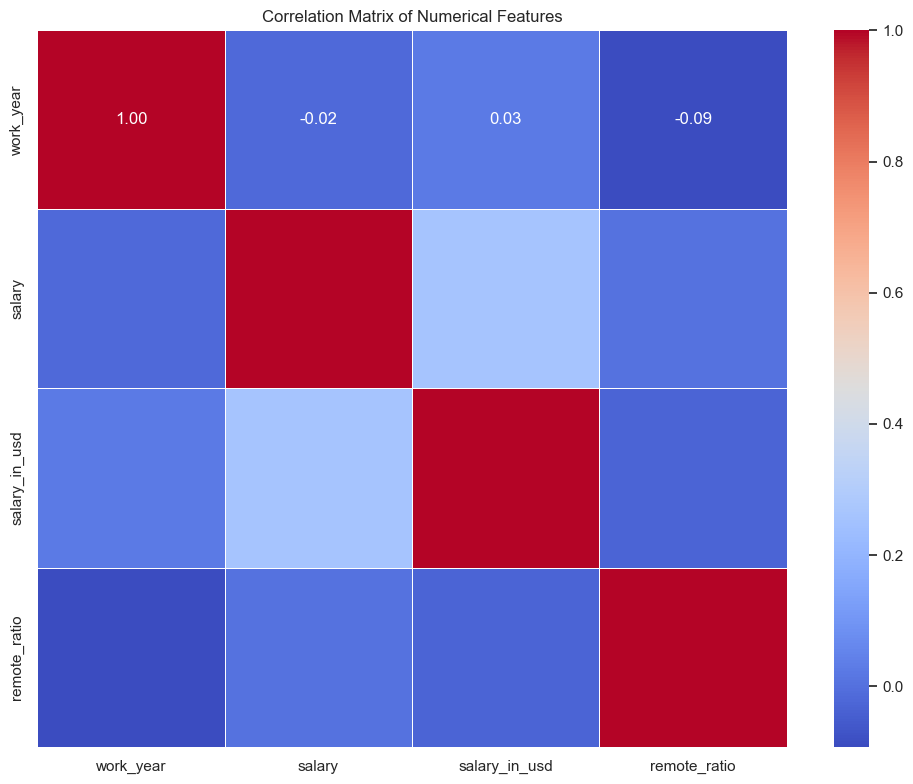

In [30]:
print("5. Heatmap - Correlation between numerical features (if any)")

numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# 5. Heatmap - Correlation between numerical features (if any)

# What We Learned About Salaries

After examining the salary data, several key insights emerged:

### [1] Job Titles and Salaries:
When we looked at different job titles, it became clear that your role really affects your pay. Jobs like "Applied Scientist" and "Principal Data Scientist" consistently offer the highest average salaries. On the other hand, positions such as "Data Analyst" typically have lower pay. This shows that more specialized or senior roles usually come with higher compensation, reflecting the expertise and responsibility required.

### [2] Company Impact:
The company you work for also plays a big role in how much you earn. Large, well-known tech companies tend to provide higher average salaries. Interestingly, these companies also show a wide range of pay, which likely reflects differences in experience levels and specific responsibilities among their employees. So, a big name company often means better pay, but there's still variety within.

### [3] Geographic Trends:
Location is a significant factor. The majority of job listings in our dataset are based in the United States, making it a major center for data roles. Countries like Great Britain also contribute significantly to the number of available jobs. This highlights where the most opportunities in this field are concentrated.

### [4] Salary Trends Over Time:
Good news for data professionals! Salaries for data and AI jobs have generally increased over the years we studied. This demonstrates a positive growth trend, suggesting that as the demand for these skills grows, so does the compensation for people in this field. It's a sign of a thriving and evolving job market.

### [5] Feature Correlations:
By looking at how different numerical features relate, we found a strong connection between the original salary and the salary in US dollars, which is expected. More importantly, there's also a clear link between salary and the year a job was posted, supporting the upward trend we observed. Other factors, such as whether a job is remote, showed weaker correlations with salary, indicating they aren't the primary drivers of pay differences.

In summary, data and AI roles are experiencing rising salaries, with higher pay in specialized positions and geographic concentration in certain countries like the US. This overall upward trend in compensation, especially for expert roles, paints a positive picture for careers in this evolving field.



## Our Step-by-Step Approach to Salary Data Analysis

To understand the salary trends, we followed a clear five-step process, making sure our data was clean and our findings were easy to see.

### Step 1: Getting Started with the Data

First, we loaded our salary data. We had two files, so we brought them into our workspace. We then took a quick look at the first few rows to see what was there. We also checked the overall size of the data (how many rows and columns), what kind of information was in each column (like numbers or text), and if there were any missing pieces of data. This initial check helped us know what we were working with.

### Step 2: Cleaning Up the Data

Next, we made sure our data was tidy.
* We handled any missing information, like filling in "Unknown" for company names that weren't there.
* We also cleaned up the column names, making them simple and consistent (like `salary_in_usd` instead of "Salary in USD").
* A crucial part was removing any duplicate rows, so we only had unique records.
* Finally, we double-checked that all salary figures were correctly stored as numbers, so we could do calculations with them.

### Step 3: Digging for Answers (Feature Analysis)

With clean data, we started asking specific questions:
* We found out all the different job titles present in the data.
* We calculated which companies offered the highest average salaries.
* We also figured out the average salary for every single job title.
* And we counted how many jobs were listed in each different location. We used tools like `group by` to get these averages and counts.

### Step 4: Showing Our Findings Visually (Data Visualization)

To make our discoveries easy to understand, we created several charts and graphs:
* We made **bar plots** to compare average salaries across different job titles.
* **Box plots** showed us how salaries were spread out within the top companies.
* **Count plots** displayed how many jobs were in each location.
* A **line plot** helped us see if salaries were going up or down over the years.
* And a **heatmap** showed us how different numerical things in the data (like salary and year) were related to each other.

### Step 5: What We Learned (Insights and Summary)

Finally, we put everything together. We wrote down the main things we learned from our charts and graphs. This included any patterns we saw in salaries based on job roles, where companies were located, and how salaries have changed over time. This step helped us summarize the big picture from our analysis.into clear insights!